<a href="https://colab.research.google.com/github/sauravdarsh/Mini-Project-Speech-Emotion-Classification/blob/main/Copy_of_M2_NB_MiniProject_5_Customer_Segmentation_Kmeans_SK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [3]:
df = pd.read_csv("Online_Retail_Train.csv")

## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [ ]:
# Count the missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64


In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [ ]:
search_results = df1['InvoiceNo'].str.contains('A')
df1[search_results]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
51050,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
279008,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
405078,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [ ]:
search_results = df1['InvoiceNo'].str.contains('C')
df1[search_results]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
34,C578367,22759,SET OF 3 NOTEBOOKS IN PARCEL,-12,2011-11-24 11:00:00,1.65,14640.0,United Kingdom
121,C573010,20979,36 PENCILS TUBE RED RETROSPOT,-11,2011-10-27 12:29:00,1.25,13735.0,United Kingdom
219,C570828,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,-6,2011-10-12 13:15:00,1.65,14911.0,EIRE
220,C563693,84050,PINK HEART SHAPE EGG FRYING PAN,-1,2011-08-18 13:04:00,1.65,17243.0,United Kingdom
...,...,...,...,...,...,...,...,...
514660,C574954,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-3,2011-11-08 09:52:00,4.95,18223.0,United Kingdom
514692,C554029,22423,REGENCY CAKESTAND 3 TIER,-1,2011-05-20 13:54:00,12.75,12681.0,France
514696,C552805,21155,RED RETROSPOT PEG BAG,-6,2011-05-11 12:34:00,2.55,14149.0,United Kingdom
514700,C546870,M,Manual,-2,2011-03-17 16:07:00,2.50,14462.0,United Kingdom


In [ ]:
# Drop the rows where quantity is adjusted
df1 = df1[~df1['InvoiceNo'].str.contains('A')]

In [ ]:
# Adjust the quantity for cancelled
df1.loc[search_results, 'Quantity'] = -1 * df1.loc[search_results, 'Quantity']

In [ ]:
search_results.info()

<class 'pandas.core.series.Series'>
Int64Index: 510059 entries, 0 to 514812
Series name: InvoiceNo
Non-Null Count   Dtype
--------------   -----
510059 non-null  bool 
dtypes: bool(1)
memory usage: 20.5 MB


In [ ]:
df1.count()

InvoiceNo      510056
StockCode      510056
Description    508671
Quantity       510056
InvoiceDate    510056
UnitPrice      510056
CustomerID     381837
Country        510056
dtype: int64

In [ ]:
# Count the missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64


In [ ]:
# handling missing values
pandas_feature=['Description','CustomerID']
df1.dropna(subset=pandas_feature, inplace=True)

# Fill the remaining null values in the pandas feature with the mean value
mean_value = df1[pandas_feature].mean()
df1[pandas_feature].fillna(mean_value, inplace=True)

# Print the updated DataFrame
print(df1)

       InvoiceNo StockCode                         Description  Quantity  \
0         579427     22636  CHILDS BREAKFAST SET CIRCUS PARADE         2   
1         554092     21916     SET 12 RETRO WHITE CHALK STICKS        24   
2         577774     84692         BOX OF 24 COCKTAIL PARASOLS         6   
5         579668     23575             SNACK TRAY PAISLEY PARK         8   
7         547684     23176              ABC TREASURE BOOK BOX          8   
...          ...       ...                                 ...       ...   
514803    551891     21402                     RED  EGG  SPOON        24   
514806    548156     22652                   TRAVEL SEWING KIT         2   
514808    545682     22975          SPACEBOY CHILDRENS EGG CUP         3   
514809    559691     22089       PAPER BUNTING VINTAGE PAISLEY        12   
514812    546837    85014B              RED RETROSPOT UMBRELLA         3   

                InvoiceDate  UnitPrice  CustomerID         Country  
0       2011-11-29

<ipython-input-16-412f776fa63e>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = df1[pandas_feature].mean()
<ipython-input-16-412f776fa63e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[pandas_feature].fillna(mean_value, inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'Age' column
df1['Age'] = imputer.fit_transform(df1[['Description']])
df1['Age'] = imputer.fit_transform(df1[['CustomerID']])

# Print the updated DataFrame
print(df1)

In [ ]:
# Removing Rows
feature = 'StockCode'
df1 = df1.drop(df1[df1[feature].isin( ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES'])].index)
# Equivalent Another Way
df1 = df1.query("StockCode not in ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']")

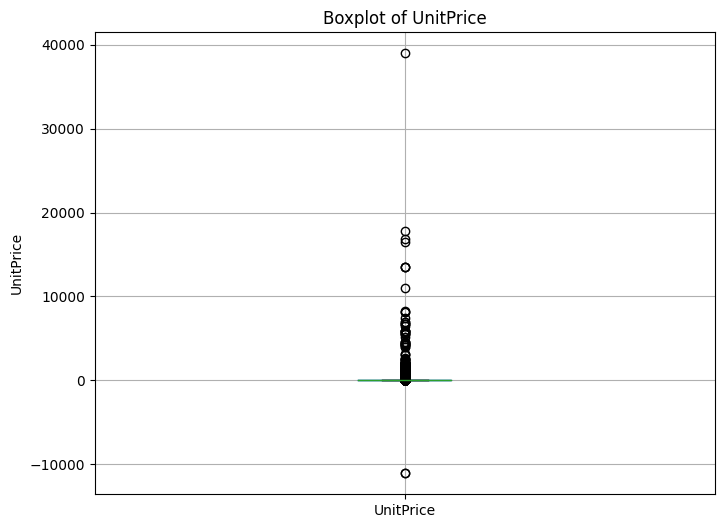

In [ ]:
# Create a boxplot using pandas
df.boxplot(column='UnitPrice', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of UnitPrice')
plt.ylabel('UnitPrice')

# Show the plot
plt.show()

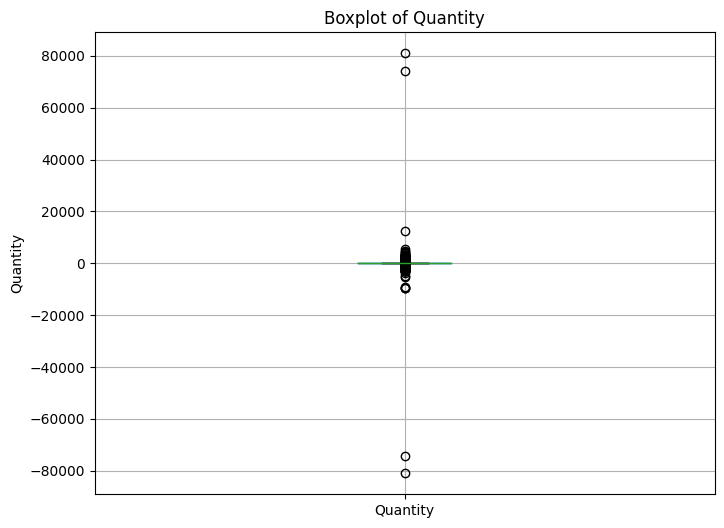

In [ ]:
# Create a boxplot using pandas
df.boxplot(column='Quantity', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')

# Show the plot
plt.show()

In [ ]:
df1= remove_outliers_iqr(df1, 'Quantity')


NameError: name 'remove_outliers_iqr' is not defined

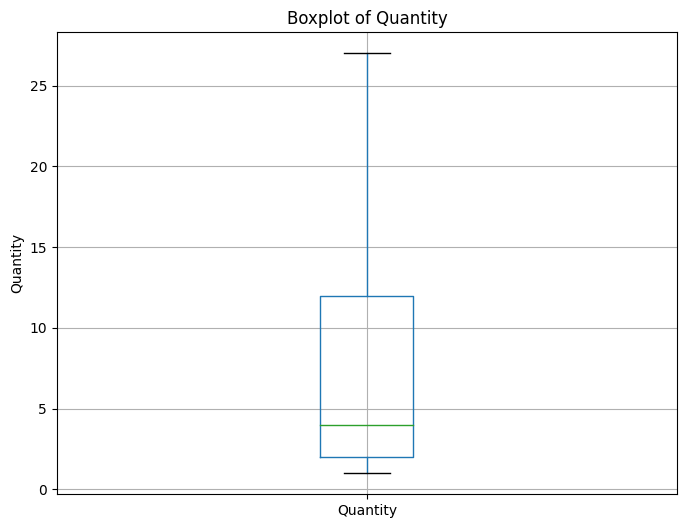

In [ ]:
# Create a boxplot using pandas
df1.boxplot(column='Quantity', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity')

# Show the plot
plt.show()

In [ ]:
df1= remove_outliers_iqr(df1, 'UnitPrice')

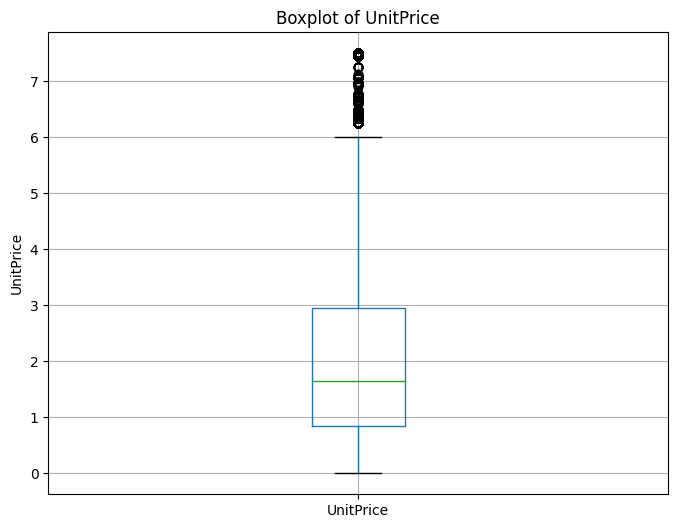

In [ ]:
# Create a boxplot using pandas
df1.boxplot(column='UnitPrice', figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of UnitPrice')
plt.ylabel('UnitPrice')

# Show the plot
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347540 entries, 1 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    347540 non-null  object 
 1   StockCode    347540 non-null  object 
 2   Description  347540 non-null  object 
 3   Quantity     347540 non-null  int64  
 4   InvoiceDate  347540 non-null  object 
 5   UnitPrice    347540 non-null  float64
 6   CustomerID   347540 non-null  float64
 7   Country      347540 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.9+ MB


In [ ]:
df1['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.weekday


In [ ]:
df1['DayOfWeek']

1         6
2         0
5         2
7         3
8         4
         ..
514803    3
514806    1
514808    6
514809    0
514812    3
Name: DayOfWeek, Length: 347540, dtype: int64

In [ ]:
def drop_duplicate_fill_mean(df, feature):
    # Drop the duplicate values in the pandas feature
    df.drop_duplicates(subset=[feature], inplace=True)

    # Fill the remaining null values in the pandas feature with the mean value
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value, inplace=True)

    # Return the updated DataFrame
    return df

def drop_null_fill_mean(df, feature):
    # Drop the rows with null values in the pandas feature
    df.dropna(subset=[feature], inplace=True)

    # Fill the remaining null values in the pandas feature with the mean value
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value, inplace=True)

    # Return the updated DataFrame
    return df

def adjust_feature_value(df, search_feature, target_feature, character):
    # Search for the character in the search feature
    df.loc[df[search_feature].str.contains(character), target_feature] *= -1

    # Return the updated DataFrame
    return df

def remove_rows_by_feature_value(data, feature, selected_values):
    # Remove rows based on feature values using isin
    data = data[~data[feature].isin(selected_values)]
    # Print the updated data
    print(data)

# Outlier removal based on Z Score
def remove_outliers(data, feature):
    # Calculate the z-score for the feature
    z_scores = (data[feature] - data[feature].mean()) / data[feature].std()

    # Define a threshold for outlier detection
    threshold = 3

    # Remove rows with z-scores greater than the threshold
    data = data[z_scores.abs() <= threshold]

    # Return the updated data
    return data

# Outlier removal based on IQR
def remove_outliers_iqr(data, feature):
    # Calculate the interquartile range for the feature
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove rows with values outside the bounds
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

    # Return the updated data
    return data

def identify_outliers_by_boxplot(data, feature):
    # Calculate the interquartile range (IQR) for the feature
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers based on the boxplot method
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Return the outliers
    return outliers

def create_day_of_week_column(dataframe):
    dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
    dataframe['DayOfWeek'] = dataframe['InvoiceDate'].dt.weekday
    return dataframe


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [ ]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,Sunday
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,Monday
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,Wednesday
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium,Thursday
8,575878,21519,GIN & TONIC DIET GREETING CARD,12,2011-11-11 13:29:00,0.42,13588.0,United Kingdom,Friday


In [ ]:
#Are there any free items in the data? How many are there?
feature_value1 = df1.loc[df1['Quantity'] == 0]
feature_value2 = df1.loc[df1['UnitPrice'] == 0]
feature_value1
feature_value2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
24182,574175,22065,CHRISTMAS PUDDING TRINKET POT,12,2011-11-03 11:47:00,0.0,14110.0,United Kingdom,Thursday
30553,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.0,13081.0,United Kingdom,Thursday
115656,572893,21208,PASTEL COLOUR HONEYCOMB FAN,5,2011-10-26 14:36:00,0.0,18059.0,United Kingdom,Wednesday
142943,553000,47566,PARTY BUNTING,4,2011-05-12 15:21:00,0.0,17667.0,United Kingdom,Thursday
173878,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,Monday
176474,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,Tuesday
242333,574920,22899,CHILDREN'S APRON DOLLY GIRL,1,2011-11-07 16:34:00,0.0,13985.0,United Kingdom,Monday
247802,562973,23157,SET OF 6 NATIVITY MAGNETS,240,2011-08-11 11:42:00,0.0,14911.0,EIRE,Thursday
269282,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom,Thursday
277037,564651,22955,36 FOIL STAR CAKE CASES,144,2011-08-26 14:19:00,0.0,14646.0,Netherlands,Friday


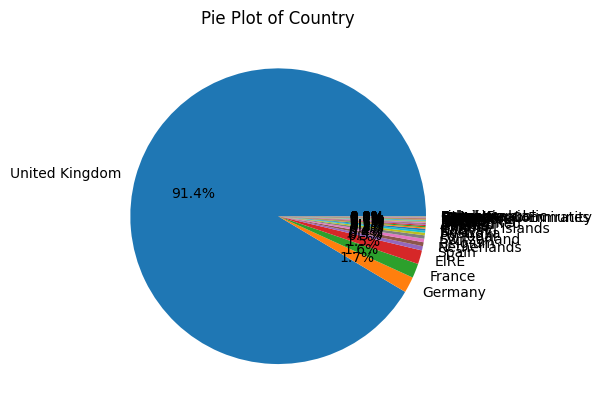

In [ ]:
#Find the number of transactions per country and visualize using an appropriate plot
# Count the occurrences of each unique value in the feature column
value_counts = df['Country'].value_counts()

# Generate the pie plot
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add a title to the plot
plt.title('Pie Plot of Country')

# Add labels to the plot
#plt.legend(value_counts.index, loc='best')

# Add labels to the plot with arrows
for i, (label, count) in enumerate(zip(value_counts.index, value_counts)):
    angle = 360 * count / sum(value_counts)
    x = 0.5 * plt.rcParams['figure.figsize'][0] * np.cos(np.pi / 180 * (angle - 0.5 * angle))
    y = 0.5 * plt.rcParams['figure.figsize'][1] * np.sin(np.pi / 180 * (angle - 0.5 * angle))
    plt.annotate(label, (x, y), xytext=(1.35*np.sign(x), 1.4*y), arrowprops=dict(arrowstyle="->"))


# Add labels to the plot with arrows
for wedge, label in zip(wedges, value_counts.index):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    x_text = np.cos(np.deg2rad(angle)) * 1.2
    y_text = np.sin(np.deg2rad(angle)) * 1.2
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle, angleA=0, angleB={angle}"
    ax.annotate(label, (x, y), xytext=(x_text, y_text), textcoords="data",
                horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))

# Display the plot
plt.show()

In [ ]:
#What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.


In [ ]:
counted_data = df1.groupby(['CustomerID', 'InvoiceNo']).size().reset_index(name='count')
counted_df = pd.DataFrame(counted_data)
counted_df = counted_df.drop_duplicates(subset=['CustomerID'])
counted_df = counted_df.drop('InvoiceNo', axis=1)
counted_df = counted_df.sort_values('count', ascending=True)
print(counted_df)



       CustomerID  count
0         12346.0      1
13370     16041.0      1
18422     17616.0      1
2247      12943.0      1
7863      14520.0      1
...           ...    ...
13095     15993.0    165
77        12378.0    185
16403     16984.0    204
17404     17337.0    215
660       12536.0    224

[4327 rows x 2 columns]


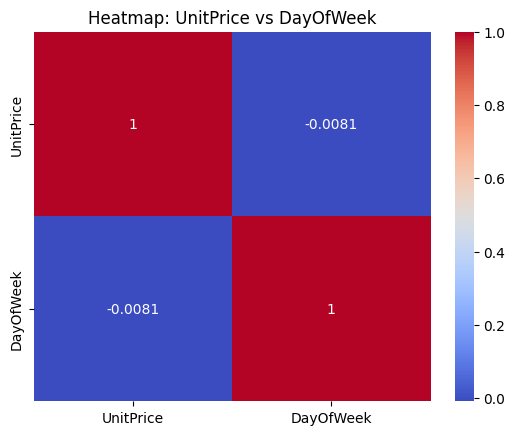

In [ ]:
#Plot heatmap showing unit price per month and day of the week
import matplotlib.pyplot as plt

# Plot a heatmap between two features
sns.heatmap(df1[['UnitPrice', 'DayOfWeek']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: UnitPrice vs DayOfWeek')
plt.show()



In [ ]:
#Find the top 10 customers who bought the most no.of items.
counted_data = df1.groupby(['CustomerID', 'InvoiceNo']).size().reset_index(name='count')
counted_df = pd.DataFrame(counted_data)
counted_df = counted_df.drop_duplicates(subset=['CustomerID'])
counted_df = counted_df.drop('InvoiceNo', axis=1)
counted_df = counted_df.sort_values('count', ascending=False)
counted_df1 = pd.DataFrame(counted_df)
pd.set_option('display.max_rows', 10000)
print(counted_df1.head(10))



       CustomerID  count
660       12536.0    224
17404     17337.0    215
16403     16984.0    204
77        12378.0    185
13095     15993.0    165
11717     15531.0    155
19981     18022.0    151
1246      12688.0    145
12495     15786.0    141
570       12501.0    134


In [ ]:
# Also find the top 10 Items bought by most no.of customers.
counted_data = df1.groupby(['Description', 'StockCode']).size().reset_index(name='count')
counted_df = pd.DataFrame(counted_data)
#counted_df = counted_df.drop_duplicates(subset=['CustomerID'])
counted_df = counted_df.drop('StockCode', axis=1)
counted_df = counted_df.sort_values('count', ascending=False)
counted_df1 = pd.DataFrame(counted_df)
pd.set_option('display.max_rows', 10000)
print(counted_df1.head(10))

                             Description  count
3473  WHITE HANGING HEART T-LIGHT HOLDER   1949
1649             JUMBO BAG RED RETROSPOT   1575
2194                       PARTY BUNTING   1345
194        ASSORTED COLOUR BIRD ORNAMENT   1325
1815             LUNCH BAG RED RETROSPOT   1293
2817   SET OF 3 CAKE TINS PANTRY DESIGN    1158
1807             LUNCH BAG  BLACK SKULL.   1047
2120     PACK OF 72 RETROSPOT CAKE CASES   1013
3128                      SPOTTY BUNTING    974
1505               HEART OF WICKER SMALL    950


## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [ ]:
df1['TotalAmount'] = df1['Quantity'] * df1['UnitPrice']
df1["RepeatPurchaseCount"] = df1.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['Month'] = df1['InvoiceDate'].dt.month



In [ ]:
def feature_engineering(df):
    df_grouped = df.groupby('CustomerID').agg({

        'InvoiceNo':'first',
        'StockCode':'first',
        'Description':'first',
        'Quantity':'sum',
        'InvoiceDate':'first',
       'UnitPrice':'mean',
        'Country':'first',
        'DayOfWeek':'first',
        'TotalAmount':'sum',
        'RepeatPurchaseCount':'sum',
        'Month':'first'
    }).reset_index()

    return df_grouped

In [ ]:
df_train = feature_engineering(df1)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           4327 non-null   float64       
 1   InvoiceNo            4327 non-null   object        
 2   StockCode            4327 non-null   object        
 3   Description          4327 non-null   object        
 4   Quantity             4327 non-null   int64         
 5   InvoiceDate          4327 non-null   datetime64[ns]
 6   UnitPrice            4327 non-null   float64       
 7   Country              4327 non-null   object        
 8   DayOfWeek            4327 non-null   int64         
 9   TotalAmount          4327 non-null   float64       
 10  RepeatPurchaseCount  4327 non-null   int64         
 11  Month                4327 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 405.8+ KB


In [ ]:
df_train.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,DayOfWeek,TotalAmount,RepeatPurchaseCount,Month
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,148430,2011-01-18 10:01:00,1.040000,35,1,154367.20,4,1
1,12347.0,573511,47567B,TEA TIME KITCHEN APRON,2321,2011-10-31 12:25:00,2.262134,16,0,3762.95,1148,10
2,12348.0,539318,21981,PACK OF 12 WOODLAND TISSUES,2188,2010-12-16 19:09:00,0.708462,12,3,1395.48,104,12
3,12349.0,577609,22960,JAM MAKING SET WITH JARS,585,2011-11-21 09:51:00,2.507241,18,0,1067.51,58,11
4,12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,196,2011-02-02 16:01:00,1.581250,24,2,294.40,16,2


In [ ]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'DayOfWeek', 'TotalAmount',
       'RepeatPurchaseCount', 'Month'],
      dtype='object')

### Scale the data

Apply `StandardScaler` on the features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns to be one-hot encoded

categorical_cols = ['Country']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column separately
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Define the features to be scaled
features_to_scale = ['TotalAmount','DayOfWeek','RepeatPurchaseCount','Month','Country']

# Fit and transform StandardScaler on training data
df_train_scaled = df_train.copy()  # Create a copy of the training data
df_train_scaled[features_to_scale] = scaler.fit_transform(df_train_scaled[features_to_scale])

# Print first few rows of the scaled training data
print("Scaled Training Data:")
print(df_train_scaled.head())

Scaled Training Data:
   CustomerID InvoiceNo StockCode                     Description  Quantity  \
0     12346.0    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR    148430   
1     12347.0    573511    47567B          TEA TIME KITCHEN APRON      2321   
2     12348.0    539318     21981    PACK OF 12 WOODLAND TISSUES       2188   
3     12349.0    577609     22960        JAM MAKING SET WITH JARS       585   
4     12350.0    543037     21908   CHOCOLATE THIS WAY METAL SIGN       196   

          InvoiceDate  UnitPrice   Country  DayOfWeek  TotalAmount  \
0 2011-01-18 10:01:00   1.040000  0.292328  -0.848548    16.408803   
1 2011-10-31 12:25:00   2.262134 -2.788060  -1.391774     0.213277   
2 2010-12-16 19:09:00   0.708462 -3.436563   0.237905    -0.041314   
3 2011-11-21 09:51:00   2.507241 -2.463808  -1.391774    -0.076582   
4 2011-02-02 16:01:00   1.581250 -1.491054  -0.305322    -0.159720   

   RepeatPurchaseCount     Month  
0            -0.061492 -1.861584  
1           

## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans with specified parameters
n_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the KMeans model on the scaled training data
kmeans.fit(df_train_scaled[features_to_scale])  # Use only the scaled features for clustering

# Extract and store the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Print the cluster centroids
print("Cluster Centroids:")
print(cluster_centroids)

Cluster Centroids:
[[-4.54693143e-02 -5.57879143e-02 -3.28862131e-02  7.61188426e-01
   2.66109280e-01]
 [ 5.50256425e-02 -5.22877955e-02 -2.74552080e-02 -1.05727072e-01
  -3.46983262e+00]
 [ 5.98317662e+00 -3.05321501e-01  3.62647426e+01  1.09812048e+00
  -1.05871909e+00]
 [-2.97258723e-02  8.78493337e-02 -1.75115337e-02 -1.03049905e+00
   2.66861033e-01]
 [ 2.42042600e+01 -3.05321501e-01  1.12738474e+00 -4.29469076e-01
  -9.67733370e-02]]


#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

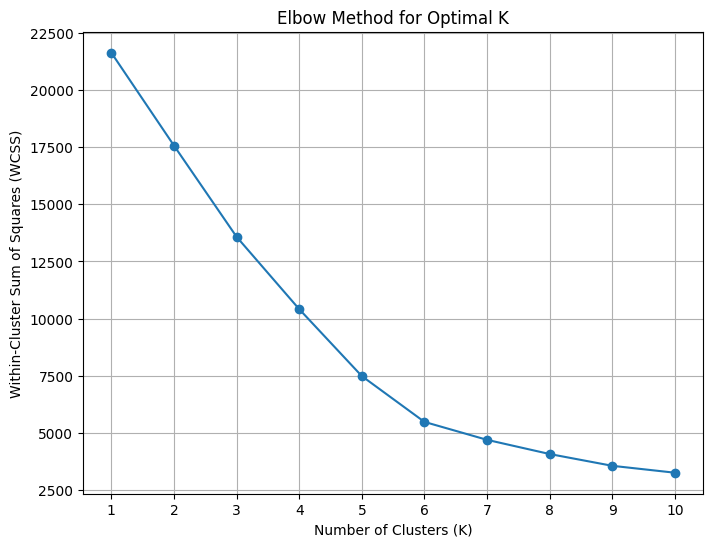

In [ ]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for different K values
wcss = []

# Define the range of K values to test (e.g., from 1 to 10 clusters)
k_values = range(1, 11)

# Iterate over each K value and fit KMeans to compute WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_train_scaled[features_to_scale])  # Use only the scaled features for clustering
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow curve to visualize the optimal K value
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize DBSCAN with epsilon and min_samples parameters
epsilon = 0.5  # Adjust epsilon based on your data and desired clustering granularity
min_samples = 5  # Minimum number of samples in a cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Fit DBSCAN on the scaled training data
dbscan_clusters = dbscan.fit_predict(df_train_scaled[features_to_scale])  # Use only the scaled features

# Evaluate DBSCAN clustering using silhouette score
silhouette_dbscan = silhouette_score(df_train_scaled[features_to_scale], dbscan_clusters)
print("Silhouette Score (DBSCAN):", silhouette_dbscan)

# Compare the number of clusters formed by DBSCAN
num_dbscan_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print("Number of Clusters (DBSCAN):", num_dbscan_clusters)

# Compare the results of clusters from KMeans and DBSCAN
kmeans_clusters = kmeans.labels_
num_kmeans_clusters = len(set(kmeans_clusters))
print("Number of Clusters (KMeans):", num_kmeans_clusters)

# Evaluate KMeans clustering using silhouette score
silhouette_kmeans = silhouette_score(df_train_scaled[features_to_scale], kmeans_clusters)
print("Silhouette Score (KMeans):", silhouette_kmeans)

Silhouette Score (DBSCAN): 0.11910241727435031
Number of Clusters (DBSCAN): 20
Number of Clusters (KMeans): 10
Silhouette Score (KMeans): 0.39331194130015257


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

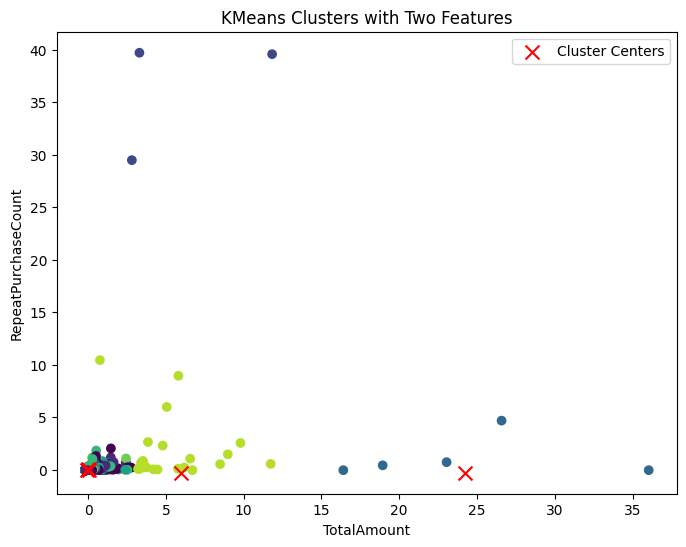

In [ ]:
# Choose two features for 2D analysis and visualization (e.g., 'Quantity' and 'TotalAmount')
# features_to_scale = ['TotalAmount','DayOfWeek','RepeatPurchaseCount','Month','Country']
features_2d = ['TotalAmount','RepeatPurchaseCount']

# Plot the clusters with different colors using predicted cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(df_train_scaled[features_2d[0]], df_train_scaled[features_2d[1]], c=kmeans_clusters, cmap='viridis')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='x', c='red', s=100, label='Cluster Centers')
plt.xlabel(features_2d[0])
plt.ylabel(features_2d[1])
plt.title('KMeans Clusters with Two Features')
plt.legend()
plt.show()

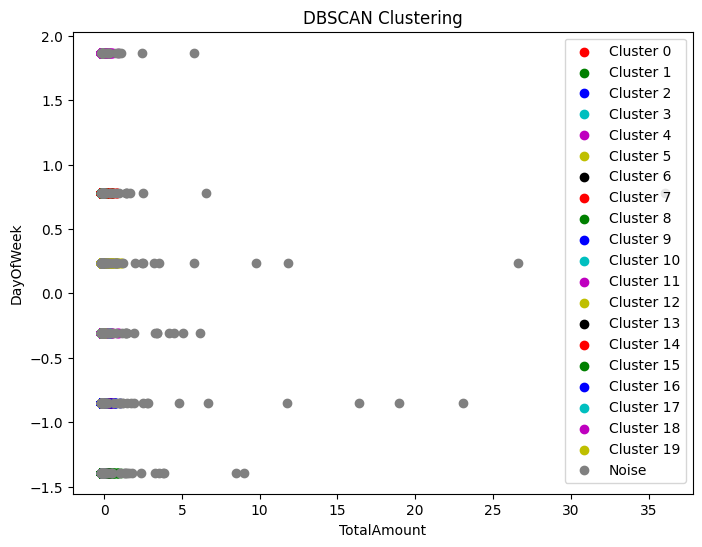

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of the data points with their corresponding DBSCAN cluster labels
plt.figure(figsize=(8, 6))
colors = np.array(['r', 'g', 'b', 'c', 'm', 'y', 'k'])  # Define colors for clusters (add more if needed)

# Plot points belonging to clusters (excluding noise points, labeled as -1)
for cluster_label in range(num_dbscan_clusters):
    cluster_points = df_train_scaled[dbscan_clusters == cluster_label]
    plt.scatter(cluster_points[features_to_scale[0]], cluster_points[features_to_scale[1]], c=colors[cluster_label % len(colors)], label=f'Cluster {cluster_label}')

# Plot noise points separately (labeled as -1)
noise_points = df_train_scaled[dbscan_clusters == -1]
plt.scatter(noise_points[features_to_scale[0]], noise_points[features_to_scale[1]], c='gray', label='Noise')

plt.title('DBSCAN Clustering')
plt.xlabel(features_to_scale[0])
plt.ylabel(features_to_scale[1])
plt.legend()
plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#features_to_scale = ['TotalAmount','DayOfWeek','RepeatPurchaseCount','Month','Country']


# Assuming df_train_encoded and df_test_encoded are your encoded training and test dataframes
# Add cluster labels to the training data
df_train_scaled['ClusterLabel'] = kmeans.labels_

# Split the data into features (X) and target (y)
X = df_train_scaled.drop('ClusterLabel', axis=1)  # Features
X = df_train_scaled[['TotalAmount','DayOfWeek','RepeatPurchaseCount','Month','Country']]
y = df_train_scaled['ClusterLabel']  # Target (Cluster Labels)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a supervised algorithm (e.g., Logistic Regression) on the training data
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Evaluate the model's performance on the test data (if ground truth labels are available)
# Assuming y_test_true contains the true labels for the test data
accuracy_test = accuracy_score(y_val, y_pred)
print("Accuracy on Test Data:", accuracy_test)

Accuracy on Test Data: 0.9953810623556582


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X

[['TotalAmount', 'DayOfWeek', 'RepeatPurchaseCount', 'Month', 'Country']]

In [ ]:
df_train_scaled.head(5)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,DayOfWeek,TotalAmount,RepeatPurchaseCount,Month,ClusterLabel
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,148430,2011-01-18 10:01:00,1.040000,0.292328,-0.848548,16.408803,-0.061492,-1.861584,3
1,12347.0,573511,47567B,TEA TIME KITCHEN APRON,2321,2011-10-31 12:25:00,2.262134,-2.788060,-1.391774,0.213277,-0.021222,0.716223,4
2,12348.0,539318,21981,PACK OF 12 WOODLAND TISSUES,2188,2010-12-16 19:09:00,0.708462,-3.436563,0.237905,-0.041314,-0.057972,1.289069,4
3,12349.0,577609,22960,JAM MAKING SET WITH JARS,585,2011-11-21 09:51:00,2.507241,-2.463808,-1.391774,-0.076582,-0.059591,1.002646,4
4,12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,196,2011-02-02 16:01:00,1.581250,-1.491054,-0.305322,-0.159720,-0.061070,-1.575161,5


### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [ ]:
# Test set provided as below
df = pd.read_csv("Online_Retail_Test.csv")
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom


In [ ]:
# Count the missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print(missing_values)

df1 = df.drop_duplicates()

search_results = df1['InvoiceNo'].str.contains('A')
df1[search_results]

search_results = df1['InvoiceNo'].str.contains('C')
df1[search_results]

# Drop the rows where quantity is adjusted
df1 = df1[~df1['InvoiceNo'].str.contains('A')]

# Adjust the quantity for cancelled
df1.loc[search_results, 'Quantity'] = -1 * df1.loc[search_results, 'Quantity']

# Count the missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print(missing_values)

# handling missing values
pandas_feature=['Description','CustomerID']
df1.dropna(subset=pandas_feature, inplace=True)

# Fill the remaining null values in the pandas feature with the mean value
mean_value = df1[pandas_feature].mean()
df1[pandas_feature].fillna(mean_value, inplace=True)

# Print the updated DataFrame
print(df1)

# Removing Rows
feature = 'StockCode'
df1 = df1.drop(df1[df1[feature].isin( ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES'])].index)
# Equivalent Another Way
df1 = df1.query("StockCode not in ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']")

df1= remove_outliers_iqr(df1, 'Quantity')
df1= remove_outliers_iqr(df1, 'UnitPrice')
df1['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.weekday
df1['TotalAmount'] = df1['Quantity'] * df1['UnitPrice']
df1["RepeatPurchaseCount"] = df1.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['Month'] = df1['InvoiceDate'].dt.month

df_train = feature_engineering(df1)

from sklearn.preprocessing import LabelEncoder

# Select categorical columns to be one-hot encoded

categorical_cols = ['Country']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column separately
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])





from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Define the features to be scaled
features_to_scale = ['TotalAmount','DayOfWeek','RepeatPurchaseCount','Month','Country']

# Fit and transform StandardScaler on training data
df_train_scaled = df_train.copy()  # Create a copy of the training data
df_train_scaled[features_to_scale] = scaler.fit_transform(df_train_scaled[features_to_scale])

# Print first few rows of the scaled training data
print("Scaled Training Data:")
print(df_train_scaled.head())

InvoiceNo         0
StockCode         0
Description      69
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6817
Country           0
dtype: int64
InvoiceNo         0
StockCode         0
Description      69
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6817
Country           0
dtype: int64
      InvoiceNo StockCode                       Description  Quantity  \
0        555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
1        554974     21128                GOLD FISHING GNOME         4   
2        550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
3        576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
4        546157     22180                    RETROSPOT LAMP         2   
...         ...       ...                               ...       ...   
27088    565213     22561       WOODEN SCHOOL COLOURING SET       144   
27089    552322     21181      PLEASE ONE PERSON METAL SIGN        12 

<ipython-input-116-359646bbfa24>:32: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = df1[pandas_feature].mean()
<ipython-input-116-359646bbfa24>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[pandas_feature].fillna(mean_value, inplace=True)


In [ ]:
df_train_scaled1 = df_train_scaled[['TotalAmount','DayOfWeek','RepeatPurchaseCount','Month','Country']]
y_pred_test = model.predict(df_train_scaled1)



In [ ]:
df_train_scaled1['ClusterLabel'] = kmeans.labels_
y = df_train_scaled1['ClusterLabel']
X = df_train_scaled.drop('ClusterLabel', axis=1)  # Features

accuracy_test = accuracy_score(y, y_pred_test)
print("Accuracy on Test Data:", accuracy_test)

In [ ]:
df_train_scaled.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,DayOfWeek,TotalAmount,RepeatPurchaseCount,Month
0,12347.0,556201,23162,REGENCY TEA STRAINER,106,2011-06-09 13:01:00,2.833636,-2.763729,0.204141,1.113810,0.001934,-0.470006
1,12349.0,577609,23112,PARISIENNE CURIO CABINET,10,2011-11-21 09:51:00,4.165000,-2.440894,-1.377659,-0.356190,-0.061716,0.989389
2,12354.0,550911,23205,CHARLOTTE BAG VINTAGE ALPHABET,10,2011-04-21 13:11:00,0.850000,-0.503883,0.204141,-0.454459,-0.062710,-1.053765
3,12355.0,552449,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,18,2011-05-09 13:49:00,2.950000,-4.700740,-1.377659,-0.179245,-0.061716,-0.761885
4,12356.0,541430,37501,TEA TIME TEA SET IN GIFT BOX,12,2011-01-18 09:50:00,6.950000,-1.149553,-0.850392,0.105691,-0.062710,-1.929402


### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?